# Lorenz attractor

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

sys.path.append("../../")
from experiments.datasets import LorenzSimulator
import plot_settings as ps
        

In [2]:
ps.setup()

In [3]:
sim1 = LorenzSimulator(random_trajectories=3, warmup=0.)
sim2 = LorenzSimulator(random_trajectories=10)

In [4]:
trajectories = [sim1.trajectory(0), sim1.trajectory(1), sim1.trajectory(2)]

In [5]:
# x = sim2.sample(1000)
x = np.load("../data/samples/lorenz/x_train.npy")[:1000]
# x = np.load("../data/samples/lorenz/x_test.npy")[:1000]

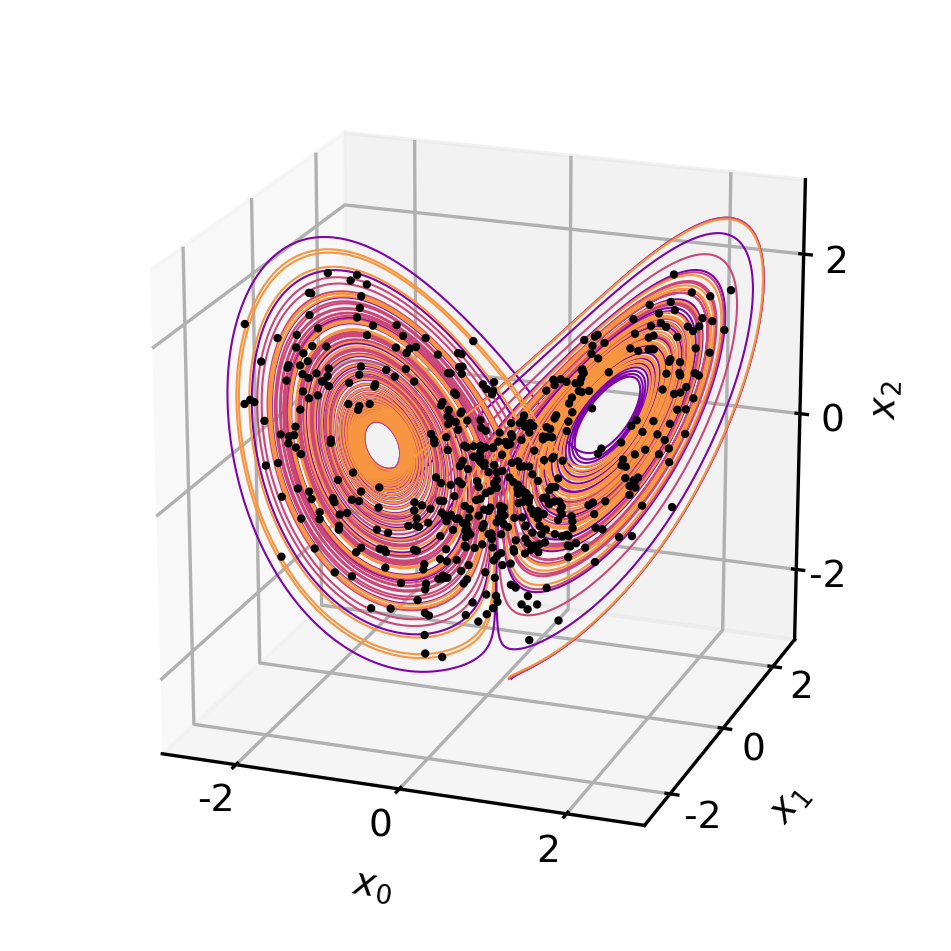

In [6]:
dots = 500
length = 40000

fig, ax = ps.figure(height=0.33*ps.TEXTWIDTH, cbar=False, make3d=True, large_margin=0.01, small_margin=0.01)

ax.set_xlim3d(-2.8, 2.8)
ax.set_ylim3d(-2.8, 2.8)
ax.set_zlim3d(-2.8, 2.8)
ax.set_xticks([-2., 0., 2.])
ax.set_yticks([-2., 0., 2.])
ax.set_zticks([-2., 0., 2.])
ax.set_xticklabels(["-2\n", "0\n", "2\n"], va="center", ha="center", linespacing=2)  # arghgh
ax.set_yticklabels(["-2   \n", "0   \n", "2   \n"], ha="center", va="center", linespacing=2)
ax.set_zticklabels(["-2     ", "0     ", "2     "], ha="center")
ax.set_xlabel("$x_0$", labelpad=-5.)
ax.set_ylabel("$x_1$", labelpad=-5.)
ax.set_zlabel("$x_2$", labelpad=-5.)

ax.view_init(elev=20, azim=-70)
for i, color in enumerate([ps.COLORS[1], ps.COLORS[2], ps.COLORS[3]]):
    ax.plot(
        trajectories[i][:length, 0], trajectories[i][:length, 1], trajectories[i][:length, 2],
        lw=0.5, c=color
    )
ax.scatter(x[:dots,0], x[:dots,1], x[:dots,2], c=ps.COLOR_NEUTRAL1, s=1., zorder=5, alpha=1.)

plt.savefig("../figures/lorenz_data.pdf")
